In [ ]:
!gdown 1XGLAnvZt9oEYCscQcqHjbva0k5S605BZ
!gdown 1EEBfIUZD0q0wRXo8pPFnIGzlzaexI6si

Downloading...
From: https://drive.google.com/uc?id=1XGLAnvZt9oEYCscQcqHjbva0k5S605BZ
To: /content/test_data.csv
100% 176k/176k [00:00<00:00, 62.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1EEBfIUZD0q0wRXo8pPFnIGzlzaexI6si
To: /content/train_data.csv
100% 692k/692k [00:00<00:00, 106MB/s]


In [ ]:
import pandas as pd

In [ ]:
train_df = pd.read_csv("train_data.csv")
test_df = pd.read_csv("test_data.csv")
train_df.head()

,clean_text,target
0,reluctant start one really ashamed ask help on...,1
1,severe addict overdose young addictionalcoholi...,1
2,feel sad feel sad pray get help desperately ne...,1
3,sleep car month month back foot stay parking s...,1
4,speed try catch continue yell face girl turn a...,0


In [ ]:
train_df['category'] = train_df['target'].apply(lambda x: '__label__stress' if x == 1 else '__label__nostress')

In [ ]:
test_df['category'] = test_df['target'].apply(lambda x: '__label__stress' if x == 1 else '__label__nostress')

In [ ]:
train_df.head()

,clean_text,target,category
0,reluctant start one really ashamed ask help on...,1,__label__stress
1,severe addict overdose young addictionalcoholi...,1,__label__stress
2,feel sad feel sad pray get help desperately ne...,1,__label__stress
3,sleep car month month back foot stay parking s...,1,__label__stress
4,speed try catch continue yell face girl turn a...,0,__label__nostress


In [ ]:
train_df["category_clean_text"] = train_df["category"] + " " + train_df["clean_text"]
test_df["category_clean_text"] = test_df["category"] + " " + test_df["clean_text"]

In [ ]:
train_df.to_csv("train_df.csv", columns=["category_clean_text"], index=False, header=False)
test_df.to_csv("test_df.csv", columns=["category_clean_text"], index=False, header=False)

In [ ]:
import nltk

nltk.download('opinion_lexicon')

neg_words= set(nltk.corpus.opinion_lexicon.negative())

def negative_words(sentence):
    words = sentence.split()
    negative_count = sum(word in neg_words for word in words)
    return negative_count/len(words)

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [ ]:
negative_words(train_df['clean_text'][0])
# train_df['clean_text'][0]

0.07894736842105263

In [ ]:
train_df['neg_percentage'] = train_df['clean_text'].apply(negative_words)

In [ ]:
train_df.head()

,clean_text,target,category,category_clean_text,neg_percentage
0,reluctant start one really ashamed ask help on...,1,__label__stress,__label__stress reluctant start one really ash...,0.078947
1,severe addict overdose young addictionalcoholi...,1,__label__stress,__label__stress severe addict overdose young a...,0.170213
2,feel sad feel sad pray get help desperately ne...,1,__label__stress,__label__stress feel sad feel sad pray get hel...,0.322581
3,sleep car month month back foot stay parking s...,1,__label__stress,__label__stress sleep car month month back foo...,0.055556
4,speed try catch continue yell face girl turn a...,0,__label__nostress,__label__nostress speed try catch continue yel...,0.109091


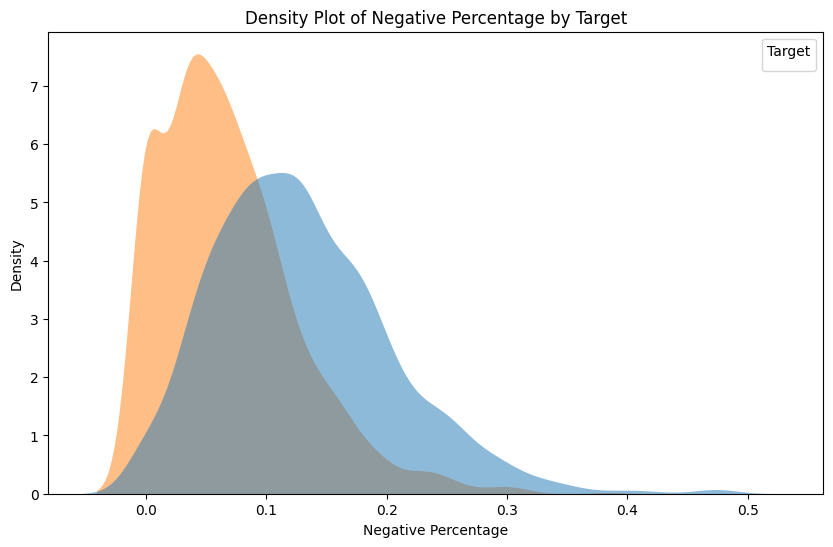

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
target_labels = {0: 'nostress', 1: 'stress'}
train_df['target_label'] = train_df['target'].map(target_labels)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=train_df, x='neg_percentage', hue='target_label', fill=True, common_norm=False, alpha=0.5, linewidth=0)
plt.title('Density Plot of Negative Percentage by Target')
plt.xlabel('Negative Percentage')
plt.ylabel('Density')
plt.legend(title='Target')
plt.show()